## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import numpy as np
from keras.preprocessing.text import Tokenizer
from nltk import ngrams
from nltk.probability import FreqDist

from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Bidirectional
from tensorflow import keras
from keras.layers import LSTM
from keras import optimizers
import tensorflow as tf
import gensim.downloader as api
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.metrics import CategoricalAccuracy, AUC
from keras.layers import TimeDistributed
from keras.layers import Conv2D,MaxPooling2D,Conv1D,MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading the Data

importing the data from the api and concatenating all the files into a single Dataframe. 

In [ ]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2023-04-23 00:54:06--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  43.8MB/s    in 0.3s    

2023-04-23 00:54:07 (43.8 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2023-04-23 00:54:07--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, 

There are three files downloaded which contain the required data.

In [ ]:
df1 = pd.read_csv('/content/data/full_dataset/goemotions_1.csv')

In [ ]:
df1.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df2 = pd.read_csv('/content/data/full_dataset/goemotions_2.csv')
df2.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,We can hope,ee3o3ko,darkenseyreth,EdmontonOilers,t3_ag4r9j,t1_ee3mhad,1.547529e+09,62,False,0,...,0,0,1,0,0,0,0,0,0,0
1,Shhh don't give them the idea!,eebl3z7,BoinkBoinkEtAliae,MurderedByWords,t3_ah3o76,t1_eeb68lo,1.547777e+09,76,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"Thank you so much, kind stranger. I really nee...",ed4fe9l,savageleaf,raisedbynarcissists,t3_abwh00,t1_ed4etbj,1.546482e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
3,Ion know but it would be better for you to jus...,efavtdu,CADDiLLXC,darknet,t3_al4njw,t3_al4njw,1.548800e+09,62,False,0,...,0,0,0,0,0,0,0,0,0,1
4,I'm honestly surprised. We should have fallen ...,ee2imz2,CorporalThornberry,CollegeBasketball,t3_afxt6t,t1_ee22nyr,1.547497e+09,55,False,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3 = pd.read_csv('/content/data/full_dataset/goemotions_3.csv')
df3.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Worst ending ever! I won't spoil it but this o...,eee021b,tribaltrak,movies,t3_agxbsx,t3_agxbsx,1.547847e+09,42,False,0,...,0,0,0,0,0,0,0,0,0,0
1,Happy cake day u/sneakpeekbot!,ed00f1z,InfernicFuse,danganronpa,t3_abajdo,t1_eczoocj,1.546328e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
2,Was he rejected because of his methodology or ...,ee1h5v1,OssToYouGoodSir,medicine,t3_aflo7s,t1_ee0v0vv,1.547464e+09,77,False,0,...,0,0,0,0,0,0,0,0,0,0
3,"thanks, I agree",eemi935,PMOFreeForever,NoFap,t3_ai7h09,t1_eelu54r,1.548088e+09,46,False,0,...,0,0,0,0,0,0,0,0,0,0
4,Why would you doubt it dumbass?,eduun99,ugliestman1,Tinder,t3_aejwne,t1_edumeal,1.547255e+09,36,False,0,...,0,0,0,0,0,0,0,0,0,0


Concatination of all the dataframe in one single dataframe.

In [ ]:
frames = [df1, df2, df3]

df = pd.concat(frames)

In [ ]:
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(211225, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211225 entries, 0 to 71224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  c

Apart from the text and labels all other fields are neglected. as they won't add much value for classification.

In [ ]:
del_col = ['id', 'author', 'subreddit', 'link_id','parent_id', 'created_utc', 'rater_id' , 'example_very_unclear'  ]
df.drop(del_col, inplace = True, axis =1 )

In [ ]:
df.head(2)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv('/content/drive/MyDrive/NLP/raw.csv', index=False)

# Data Preparation

The labels are distributed in multiple columns. For which planning to merge them under single column referred as labels. 
As our group has decided to combine multiple labels into 1 for similar emotions. 
The final labels are:
LABELS (COMBINED SIMILAR)
1. Admiration (admiration, Approval)
2. Excitement (Amusement, excitement, Surprise)
3. Anger (Anger, Annoyance)
4. Love (Caring, Love, Desire)
5. Disappointment (Disappointment, Disapproval)
6. Gratitude (Gratitude, Optimism, Joy)
7. Sad (Grief, Sadness)
8. Curiosity
9. Embarassment
10. fear
11. pride
12. nervousness
13. disgust
14. neutral

Also there are some texts that contain multipple labels. Hence to handle them, we have used the 1st occuring label in the list.


In [ ]:
# Admiration (admiration, Approval) 
for i in range(len(df)):
  if (df.iloc[i, 5] == 1):
    df.iloc[i, 1] = 1

In [ ]:
# removing the approval column from the dataset
df.drop(['approval'], inplace = True, axis = 1)

In [ ]:
# Excitement (Amusement, excitement)
for i in range(len(df)):
  if (df.iloc[i, 2] == 1):
    df.iloc[i, 13] = 1

In [ ]:
# removing the amusement  
df.drop(['amusement'], inplace= True, axis = 1)

In [ ]:
# Anger <- Anger, Annoyance
for i in range(len(df)):
  if (df.iloc[i, 3] == 1):
    df.iloc[i, 2] = 1

In [ ]:
# Removing the annoyance
df.drop(['annoyance'] ,inplace = True,axis = 1 )

In [ ]:
# Love <- Caring, Love, desire
for i in range(len(df)):
  if (df.iloc[i, 3] == 1  or df.iloc[i, 6] == 1):
    df.iloc[i, 16] = 1

# discarding Caring and desire
df.drop(['caring', 'desire'], inplace = True, axis = 1)

In [ ]:
# Disappointment <- Disappointment, Disapproval
for i in range(len(df)):
  if (df.iloc[i, 6] == 1):
    df.iloc[i, 5] = 1

# discarding disapproval
df.drop('disapproval',axis= 1, inplace= True)

In [ ]:
# Gratitude <- Gratitude, optimism
for i in range(len(df)):
  if (df.iloc[i, 15] == 1):
    df.iloc[i, 10] = 1

df.drop('optimism', inplace = True, axis = 1)

In [ ]:
# SAD <- Grief, sadness, remorse, confusion
for i in range(len(df)):
  if (df.iloc[i, 11] == 1) or df.iloc[i, 18] == 1 or df.iloc[i,3 ] == 1 :
    df.iloc[i, 19] = 1

# discarding grief, remorse, confusion 
df.drop(['grief', 'remorse', 'confusion'], inplace = True, axis =1)

In [ ]:
# Excitement <- surprise
for i in range(len(df)):
  if (df.iloc[i, 17] == 1) :
    df.iloc[i, 7] = 1

df.drop('surprise', inplace = True, axis =1 )

In [ ]:
# gratitude <- Joy
for i in range(len(df)):
  if (df.iloc[i, 9] == 1) :
    df.iloc[i, 10] = 1

df.drop('joy', inplace = True, axis = 1)

In [ ]:
# discarded realization and relief
df.drop(['realization','relief'], inplace= True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211225 entries, 0 to 71224
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   text            211225 non-null  object
 1   admiration      211225 non-null  int64 
 2   anger           211225 non-null  int64 
 3   curiosity       211225 non-null  int64 
 4   disappointment  211225 non-null  int64 
 5   disgust         211225 non-null  int64 
 6   embarrassment   211225 non-null  int64 
 7   excitement      211225 non-null  int64 
 8   fear            211225 non-null  int64 
 9   gratitude       211225 non-null  int64 
 10  love            211225 non-null  int64 
 11  nervousness     211225 non-null  int64 
 12  pride           211225 non-null  int64 
 13  sadness         211225 non-null  int64 
 14  neutral         211225 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 25.8+ MB


In [ ]:
map = {'admiration':1, 'anger': 2, 'curiosity': 3, 'disappointment':4
       ,'disgust':5, 
       'embarrassment':6,
       'excitement':7,
       'fear': 8,
       'gratitude':9, 
       'love':10,
       'nervousness':11,
       'pride':12,
       'sadness':13,
       	'neutral':14
       }

Labels merged into one column

In [ ]:
df['labels'] = 0

In [ ]:
for idx, col in enumerate(df.columns):
  if idx > 0 and idx < len(df.columns)-1: 
    # print(idx, col)
    for row in range(len(df)):
      if df.iloc[row, idx] == 1 and df.iloc[row, -1] ==0 :
        df.iloc[row, -1] = map.get(col)

In [ ]:
df.labels.value_counts()

14    55298
1     33385
2     19768
7     16529
4     16397
9     14622
0     13378
10    12151
13    11371
3      8699
5      3572
8      2541
6      1808
11      947
12      759
Name: labels, dtype: int64

In [ ]:
final_df = df.query("labels != 0")

In [ ]:
print(final_df.shape)

(197847, 16)


In [ ]:
final_cols = final_df.columns
# deleting the text and labels column to get all other remaining columns 
final_cols = final_cols.delete(0)
final_cols = final_cols.delete(14)

In [ ]:
final_df.drop(final_cols, axis =1 , inplace= True)

<ipython-input-80-df5c2cc68c40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(final_cols, axis =1 , inplace= True)


In [ ]:
final_df.head(2)

,text,labels
0,That game hurt.,13
2,"You do right, if you don't care then fuck 'em!",14


saving the csv file 

In [ ]:
final_df.to_csv('/content/drive/MyDrive/NLP/temp.csv', index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/NLP/temp.csv').head(2)

,text,labels
0,That game hurt.,13
1,"You do right, if you don't care then fuck 'em!",14


# Data Visualisation and Analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/temp.csv')
df.head(2)

,text,labels
0,That game hurt.,13
1,"You do right, if you don't care then fuck 'em!",14


In [ ]:
df['text'].isnull().sum()

0

The labels are mapped as follows

In [ ]:
map = {1:'admiration', 2 : 'anger', 3:'curiosity',4: 'disappointment'
       ,5:'disgust', 
       6:'embarrassment',
       7:'excitement',
       8:'fear',
       9:'gratitude', 
       10:'love',
       11: 'nervousness',
       12:'pride',
       13:'sadness',
       14: 'neutral'
       }

In [ ]:
y = df['labels'].map(map)

In [ ]:
y.head(2)

0    sadness
1    neutral
Name: labels, dtype: object

In [ ]:
df.labels.head(2)

0    13
1    14
Name: labels, dtype: int64

In [ ]:
y.value_counts()

neutral           55298
admiration        33385
anger             19768
excitement        16529
disappointment    16397
gratitude         14622
love              12151
sadness           11371
curiosity          8699
disgust            3572
fear               2541
embarrassment      1808
nervousness         947
pride               759
Name: labels, dtype: int64

The data contains text with most neutral fields. 

The sentences contain:
1. [Name]  - referenced to usernames or person
2. [Religion] - referenced to religious content 
2. special characters like --> Heâ€™s and double inverted commas as well

In [ ]:
def count_occurences(data, exp):
  count = 0
  for i in range(len(data)):
    if (data['text'][i].find(exp)) != -1:
      count =count+ 1
  per = count/ len(data) *100
  print(f"count for {exp}: {count} \ntotal sentences {len(data)}\npercentage = {per}")

In [ ]:
count_occurences(df, '[NAME]')

count for [NAME]: 27590 
total sentences 197847
percentage = 13.945119208277104


In [ ]:
count_occurences(df, '[RELIGION]')

count for [RELIGION]: 431 
total sentences 197847
percentage = 0.2178451025287217


As the religion text is negligible in the complete corpus of dataset, we'll keep it untouched.

while removing the NAME text from the corpus

##Measures of Length

*   word count: counts the number of tokens in the text (separated by a space)
*   character count: sum the number of characters of each token
*   sentence count: count the number of sentences (separated by a period)
*   average word length: sum of words length divided by the number of words (character count/word count)
*   average sentence length: sum of sentences length divided by the number of sentences (word count/sentence count)

In [ ]:
df['word_count'] = df["text"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["text"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

In [ ]:
def print_info(col_name):
  print(f"Max {col_name}: {df[col_name].max()}")
  print(f"Min {col_name}: {df[col_name].min()}")
  print(f"Average {col_name}: {df[col_name].mean()}")


In [ ]:
print("---------Word Count--------------")
print_info('word_count')
print("---------Sentence Count--------------")
print_info('sentence_count')
print("--------- Avg Word Length--------------")
print_info('avg_word_length')
print("--------- Avg Sentence Length--------------")
print_info('avg_sentence_lenght')


---------Word Count--------------
Max word_count: 33
Min word_count: 1
Average word_count: 13.074309946574878
---------Sentence Count--------------
Max sentence_count: 21
Min sentence_count: 1
Average sentence_count: 2.0838172931608767
--------- Avg Word Length--------------
Max avg_word_length: 49.285714285714285
Min avg_word_length: 1.0
Average avg_word_length: 4.455149018283986
--------- Avg Sentence Length--------------
Max avg_sentence_lenght: 32.0
Min avg_sentence_lenght: 0.047619047619047616
Average avg_sentence_lenght: 7.471717231032078


<Figure size 1000x1000 with 0 Axes>

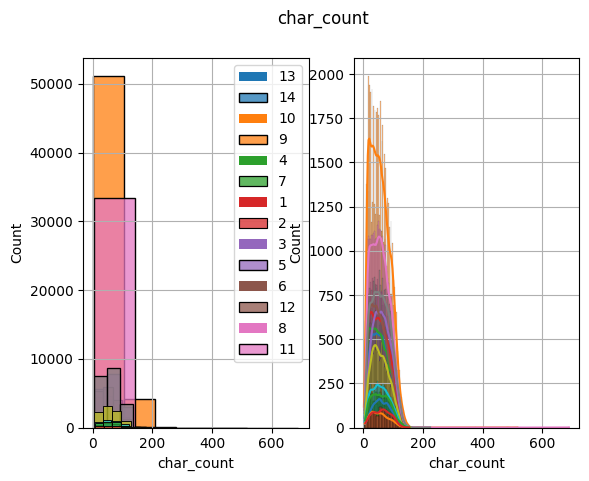

In [ ]:
x, y = "char_count", "labels"
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in df[y].unique():
    sns.histplot(df[df[y]==i][x],  
                bins=5,
                ax=ax[0])
    sns.color_palette("Spectral", as_cmap=True)
    sns.histplot(df[df[y]==i][x], kde=True, 
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(df.labels.unique())
ax[1].grid(True)
plt.show()

## text processing

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Text preprocessing.
1. Removing the [NAME] , all other unwanted special characters.
2. converting the text to lowercase.
3. excluding the stopwords
4. stemming.

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
stemmer = PorterStemmer()
stp_words = set(stopwords.words('english'))

In [ ]:
def clean_text(data):
  for i in range(len(data)):
    sent = data['text'][i].replace("NAME", "")
    sent = re.sub('[^a-zA-Z]', " ", sent)
    sent = sent.lower()
    sent = sent.split()
    sent = [stemmer.stem(words) for words in sent if words not in stp_words]
    data['text'][i] = ' '.join(sent)

In [ ]:
clean_text(df)

<ipython-input-15-01aaa0ce3ecd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = ' '.join(sent)


In [ ]:
df[df.text.isnull() == True ] 

,text,labels,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght


In [ ]:
df['word_count_p'] = df["text"].apply(lambda x: len(str(x).split(" ")))
df['char_count_p'] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count_p'] = df["text"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length_p'] = df['char_count_p'] / df['word_count_p']
df['avg_sentence_lenght_p'] = df['word_count_p'] / df['sentence_count_p']
df.head()

,text,labels,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,word_count_p,char_count_p,sentence_count_p,avg_word_length_p,avg_sentence_lenght_p
0,game hurt,13,3,13,2,4.333333,1.50,2,8,1,4.000000,2.0
1,right care fuck em,14,10,37,1,3.700000,10.00,4,15,1,3.750000,4.0
2,man love reddit,10,4,15,2,3.750000,2.00,3,13,1,4.333333,3.0
3,nowher near falcon,14,11,42,2,3.818182,5.50,3,16,1,5.333333,3.0
4,right consid import document know damn thing b...,9,21,115,4,5.476190,5.25,11,62,1,5.636364,11.0


In [ ]:
print("---------Word Count--------------")
print_info('word_count_p')
print("---------Sentence Count--------------")
print_info('sentence_count_p')
print("--------- Avg Word Length--------------")
print_info('avg_word_length_p')
print("--------- Avg Sentence Length--------------")
print_info('avg_sentence_lenght_p')


---------Word Count--------------
Max word_count_p: 33
Min word_count_p: 1
Average word_count_p: 6.349861256425419
---------Sentence Count--------------
Max sentence_count_p: 1
Min sentence_count_p: 1
Average sentence_count_p: 1.0
--------- Avg Word Length--------------
Max avg_word_length_p: 42.4
Min avg_word_length_p: 0.0
Average avg_word_length_p: 4.789737545341939
--------- Avg Sentence Length--------------
Max avg_sentence_lenght_p: 33.0
Min avg_sentence_lenght_p: 1.0
Average avg_sentence_lenght_p: 6.349861256425419


In [ ]:
word_ana = pd.DataFrame(data = [[33,1,13.075,
                                 49.28,1, 4.45,
                                 32,0.04,7.47 
                                 ],
                                [33,1,6.35,
                                 42.4,0,4.79,
                                 33,1,6.35
                                 ] ], columns= [
    'Word Count_max','Word Count_min','Word Count_avg',
    'Avg Word Length_max','Avg Word Length_min','Avg Word Length_avg', 
    'Avg Sentence Length_max','Avg Sentence Length_min','Avg Sentence Length_avg', 
     ])

In [ ]:
word_ana.head()

,Word Count_max,Word Count_min,Word Count_avg,Avg Word Length_max,Avg Word Length_min,Avg Word Length_avg,Avg Sentence Length_max,Avg Sentence Length_min,Avg Sentence Length_avg
0,33,1,13.075,49.28,1,4.45,32,0.04,7.47
1,33,1,6.350,42.40,0,4.79,33,1.00,6.35


Text(0.5, 1.0, 'Difference of Word counts,length between processed and unprocessed text.')

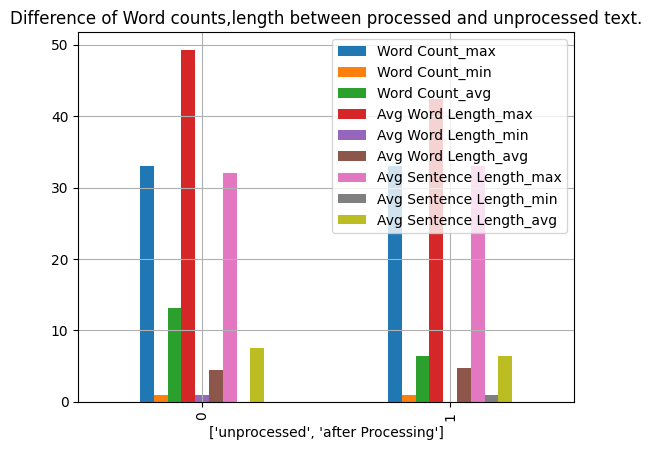

In [ ]:
lab = ['unprocessed', 'after Processing']
word_ana.plot(kind = 'bar')
plt.xlabel(lab)
plt.grid()
plt.title('Difference of Word counts,length between processed and unprocessed text.')

In [ ]:
df.to_csv('/content/drive/MyDrive/NLP/text_pro.csv')

## word cloud

In [ ]:
# pararaph of all the words
corpus = ''.join(df['text'])

In [ ]:
from collections import Counter
def count_words_fast(text):     
    word_counts = Counter(text.split(" ")) 
    return word_counts 

def word_stats(word_counts):      
    num_unique = len(word_counts) 
    counts = word_counts.values() 
    return (num_unique, counts) 

In [ ]:
word_counts = count_words_fast(corpus)

In [ ]:
word_counts.most_common()[:10]

[('like', 12905),
 ('get', 9892),
 ('peopl', 6708),
 ('one', 6611),
 ('would', 6348),
 ('make', 6170),
 ('go', 5943),
 ('good', 5335),
 ('love', 5153),
 ('think', 4947)]

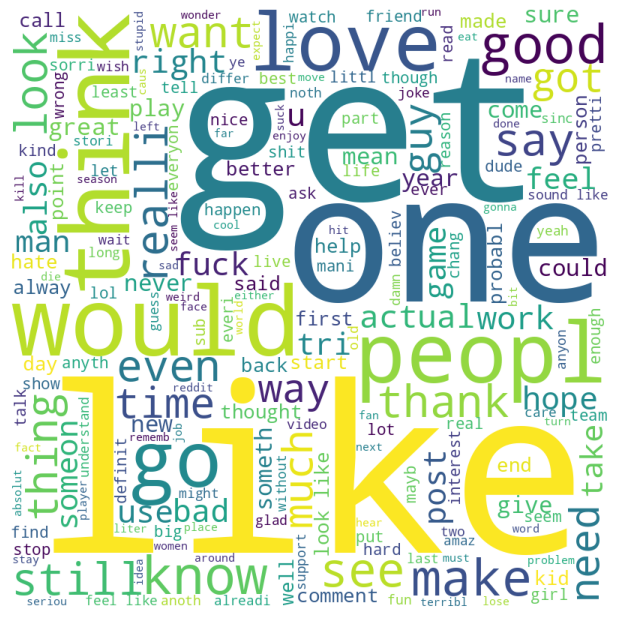

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stp_words,
                min_font_size = 10).generate(corpus)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

it is evident that words - like, get, one people are used quite often.  

## n grams

In [ ]:
# from sklearn.feature_extraction import text
corpus = ''.join(df['text'])
words = corpus.split(" ")

nlp_words=FreqDist(words).most_common(20) 
f_distrib = pd.Series(dict(nlp_words))

In [ ]:
f_distrib[:5]

like     12905
get       9892
peopl     6708
one       6611
would     6348
dtype: int64

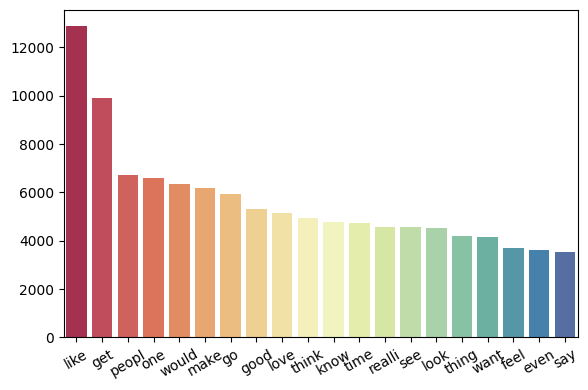

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
all_plot = sns.barplot(x=f_distrib.index, y=f_distrib.values, ax=ax, palette='Spectral')
plt.xticks(rotation=30)
plt.tight_layout()

The plot confirms the occurence of words that we saw in wordcloud.

In [ ]:
def nGrams(count):
  bigram = ngrams(words, count)
  frq_bigram = FreqDist(bigram).most_common(30)
  bigram_words = {'_'.join(k):v for k,v in sorted(frq_bigram, key=lambda item:item[1]) }
  return bigram_words

Bi_gram

In [ ]:
freq_bigram = pd.Series(nGrams(2))

Three_gram

In [ ]:
three_gram_words = pd.Series(nGrams(3))

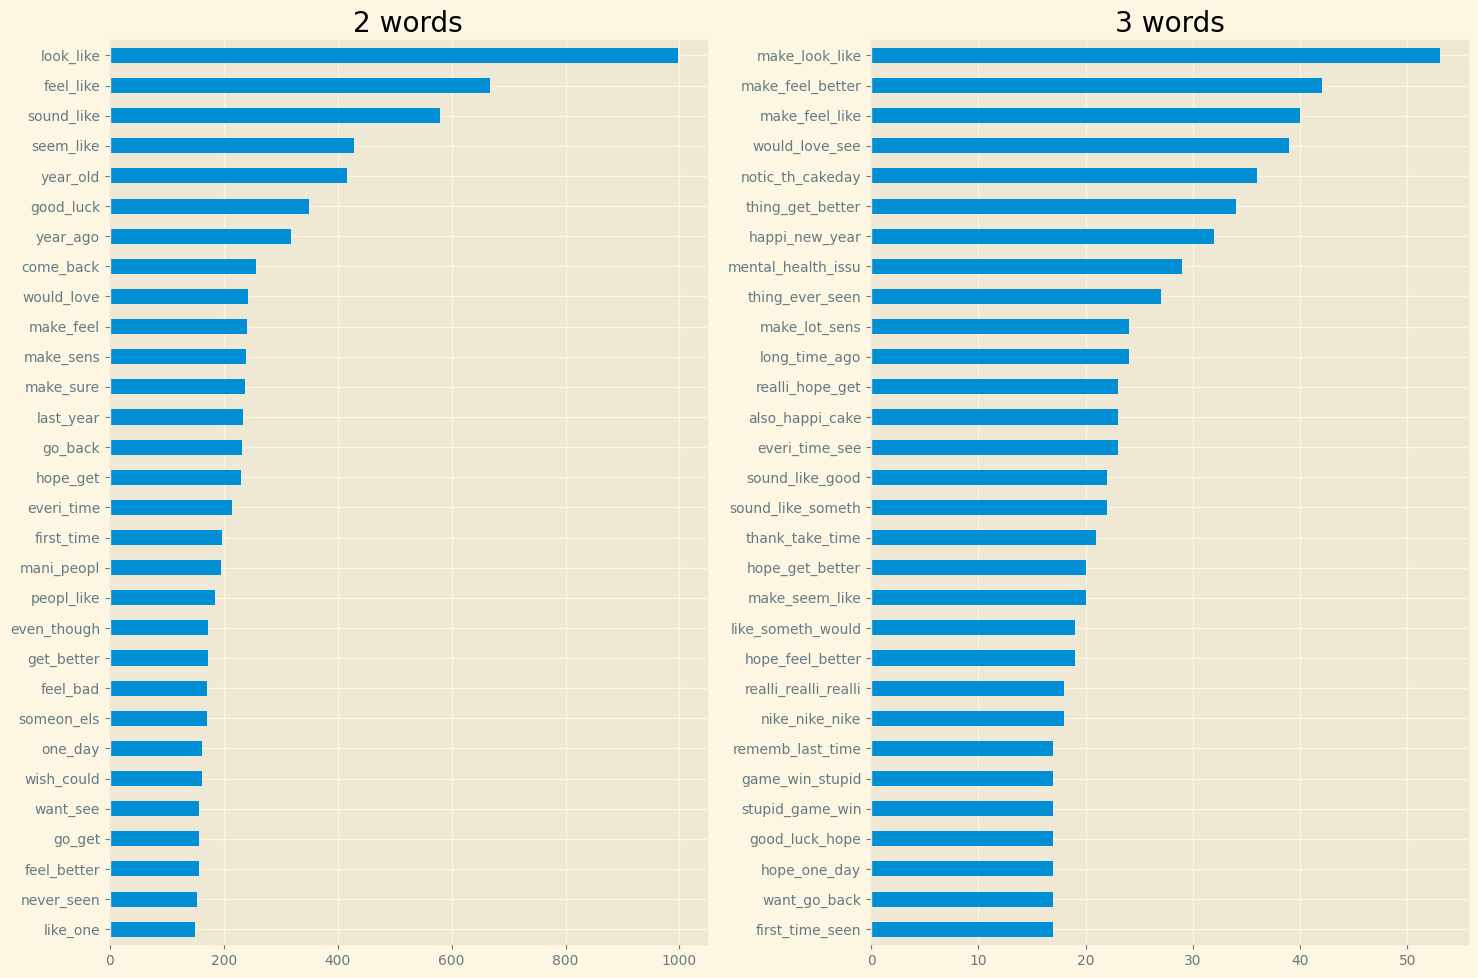

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols= 2)
fig.set_figheight(10)
fig.set_figwidth(15)

plt.style.use("fivethirtyeight")

freq_bigram.plot(kind = 'barh', ax= ax[0])
ax[0].set_title("2 words")


three_gram_words.plot(kind = 'barh' ,ax = ax[1])
ax[1].set_title("3 words")

fig.tight_layout()

The n-grams reveal us the count of the occurence of words together in a sparse document of text. 

For eg. As the words like "like" were most common in the wordcloud. We can infer the same by assessing the n-grams. Here, it is evident that a a bigram the "like" keyword is used with look, feel, sound, seem, people,etc. 
Whereas for the tri-gram suggests that the same key is used better with 'make' with the combination of bigram. 


## sentiment analysis of the dataset

as we have seen earlier that the data contains more of a neutral views.
So vaguely to verify that we can use TextBlob library's NaiveBayesAnalyser  

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
temp = df.copy()

In [ ]:
temp['polarity'] = 0
polarity = []
for i in range(len(temp.text)):
  sent = TextBlob(temp.text[i])
  polarity.append( sent.sentiment.polarity)

temp.polarity = polarity

polarity suggests range of the sentiments of that particular text.

-1 being the negative and +1 being the positive while 0 being the neutral.

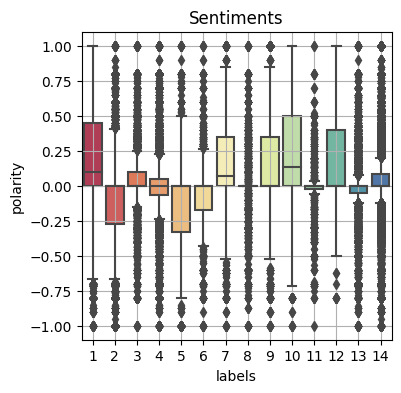

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
sns.boxplot(ax = ax, x = 'labels', y = 'polarity',data = temp,  palette = 'Spectral')
ax.set_title('Sentiments')
ax.grid()

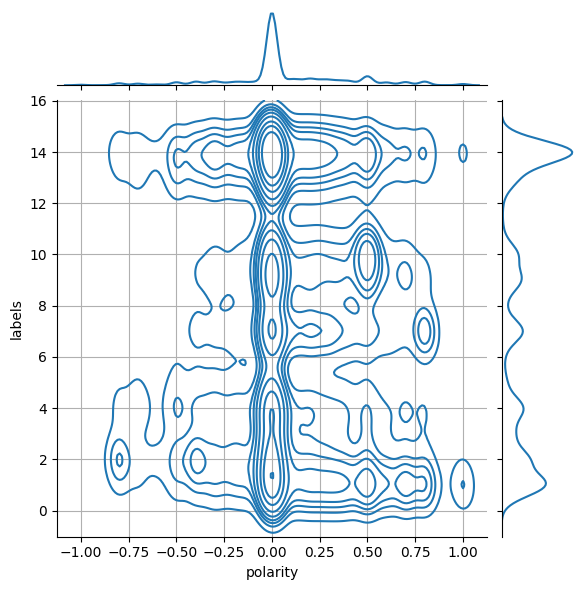

In [ ]:
sns.jointplot(data = temp, x = 'polarity', y = 'labels', kind = 'kde')
plt.grid()

In [ ]:
map = {1:'admiration', 2 : 'anger', 3:'curiosity',4: 'disappointment'
       ,5:'disgust', 
       6:'embarrassment',
       7:'excitement',
       8:'fear',
       9:'gratitude', 
       10:'love',
       11: 'nervousness',
       12:'pride',
       13:'sadness',
       14: 'neutral'
       }

the plots above suggest that we have more of a neutral data

and replicate that all the texts are labelled significantly correct. 

##  train_test_split

Splitting the data into 64% train, 16% Validation,20% test. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head(2)

,text,labels
0,game hurt,13
1,right care fuck em,14


In [ ]:
df[df.text.isnull() == True ] 

,text,labels


In [ ]:
X = df['text']
y = df['labels']

train and test split 80/ 20 split


In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state = 42)

train and validation split

using the train set to further split it as 80% train and 20% validation


In [ ]:
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 42)

In [ ]:
X_train[X_train.isnull() == True ] 

Series([], Name: text, dtype: object)

TEST

In [ ]:
y_test_label = y_test.map(map)

<Axes: >

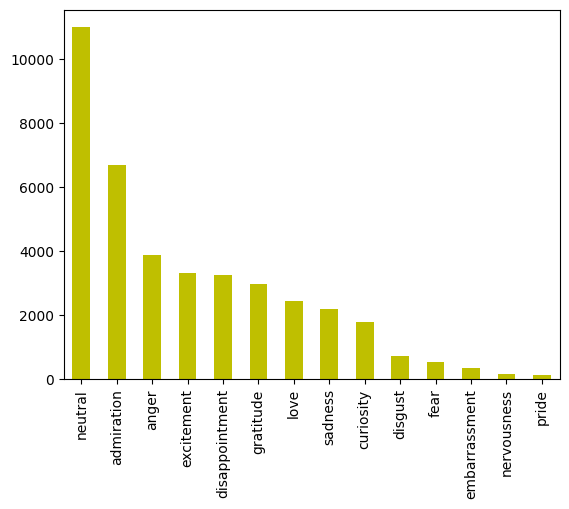

In [ ]:
y_test_label.value_counts().plot(kind='bar', color = 'y')

ditribution of categries in test set

TRAIN

In [ ]:
y_train_label = y_train.map(map)

<Axes: >

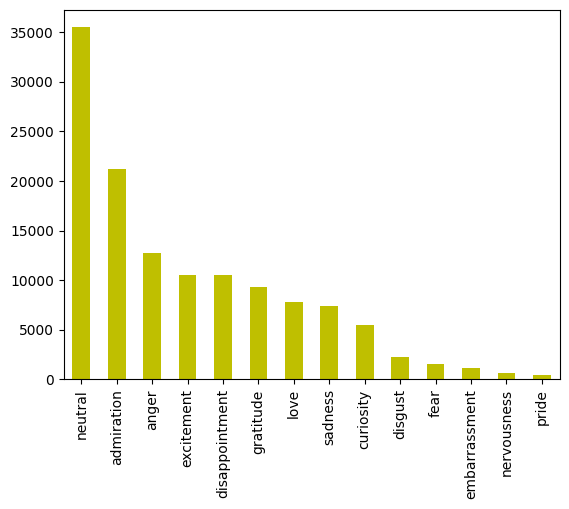

In [ ]:
y_train_label.value_counts().plot(kind='bar', color = 'y')

ditribution of categries in train set

VALIDATION 

<Axes: >

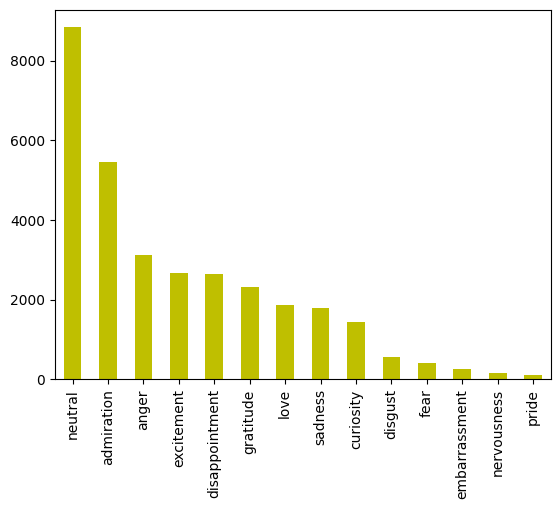

In [ ]:
y_val_label = y_val.map(map)
y_val_label.value_counts().plot(kind='bar', color = 'y')

ditribution of categries in validation set

# Experiment 1

Experiment details.
1. Tokenize the words and create a vocabulary.
2. padding - post, length = 50
3. used bi-directional-Lstm model 

stemming is already done.
Importing the train and test dataset

In [ ]:
# Hyperparameters
vocab_size = 25000
embedding_dim = 64
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
output_dim = 15
bi_directional_dim = 512

## tokenization and Vocabulary

tokenizer will hash each word and provide the vocabulary based on the max length of words specified.

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
dict(list(word_index.items()) [0:10])

{'<OOV>': 1,
 'like': 2,
 'get': 3,
 'thank': 4,
 'love': 5,
 'one': 6,
 'would': 7,
 'peopl': 8,
 'think': 9,
 'good': 10}

In [ ]:
train_seq = tokenizer.texts_to_sequences(X_train)
val_seq = tokenizer.texts_to_sequences(x_val)
test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
X_train.shape

(126621,)

In [ ]:
y_train.shape

(126621,)

## padding



In [ ]:
from keras.utils import pad_sequences
train_padding = pad_sequences(train_seq, max_length, padding = padding_type, truncating= trunc_type)

In [ ]:
# for test data
test_padding = pad_sequences(test_seq, max_length, padding = padding_type, truncating= trunc_type)

In [ ]:
val_padding = pad_sequences(val_seq, max_length,  padding = padding_type, truncating= trunc_type )

In [ ]:
train_labels = np.array(y_train)
train_labels.shape

(126621,)

In [ ]:
test_labels = np.array(y_test)
test_labels.shape

(39570,)

In [ ]:
val_labels = np.array(y_val)
val_labels.shape

(31656,)

In [ ]:
train_padding.shape

(126621, 50)

In [ ]:
test_padding.shape

(39570, 50)

In [ ]:
val_padding.shape

(31656, 50)

## defining model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(bi_directional_dim, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(bi_directional_dim)))
model.add(Dropout(0.5))
model.add(Dense(bi_directional_dim, activation='relu'))
model.add(Dense(output_dim, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            1600000   
                                                                 
 bidirectional (Bidirectiona  (None, 50, 1024)         2363392   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 1024)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1024)             6295552   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               5

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Checkpoints to save the models.

In [ ]:
import tensorflow as tf

checkpoint_path = "/content/drive/MyDrive/NLP/models/model_{epoch:01d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq = 5 * 128
                                                 )

training

In [ ]:
num_epochs = 30
history = model.fit(
    train_padding,
    train_labels, 
    epochs= num_epochs,
    validation_data=  (val_padding, val_labels), 
    batch_size = 128,
    callbacks = [cp_callback]
    ) 

Epoch 1/30
639/990 [==================>...........] - ETA: 48s - loss: 1.9530 - accuracy: 0.3762
Epoch 1: saving model to /content/drive/MyDrive/NLP/models/model_1.ckpt
990/990 [==============================] - 156s 145ms/step - loss: 1.8824 - accuracy: 0.4000 - val_loss: 1.7355 - val_accuracy: 0.4415
Epoch 2/30
289/990 [=======>......................] - ETA: 1:18 - loss: 1.6453 - accuracy: 0.4654
Epoch 2: saving model to /content/drive/MyDrive/NLP/models/model_2.ckpt
929/990 [===========================>..] - ETA: 6s - loss: 1.6520 - accuracy: 0.4624
Epoch 2: saving model to /content/drive/MyDrive/NLP/models/model_2.ckpt
990/990 [==============================] - 122s 123ms/step - loss: 1.6534 - accuracy: 0.4621 - val_loss: 1.6977 - val_accuracy: 0.4496
Epoch 3/30
579/990 [================>.............] - ETA: 45s - loss: 1.5614 - accuracy: 0.4858
Epoch 3: saving model to /content/drive/MyDrive/NLP/models/model_3.ckpt
990/990 [==============================] - 123s 124ms/step - loss

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/NLP/experimentation/exp1.h5')

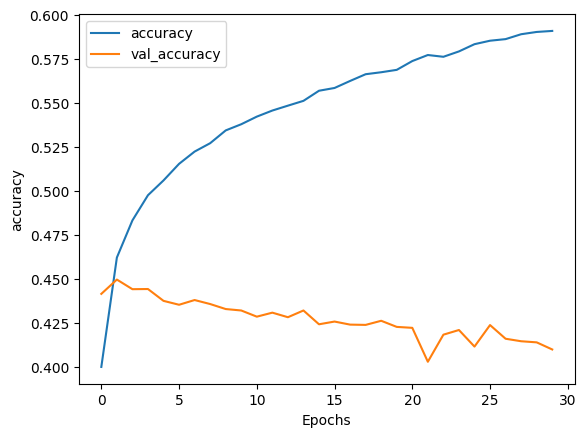

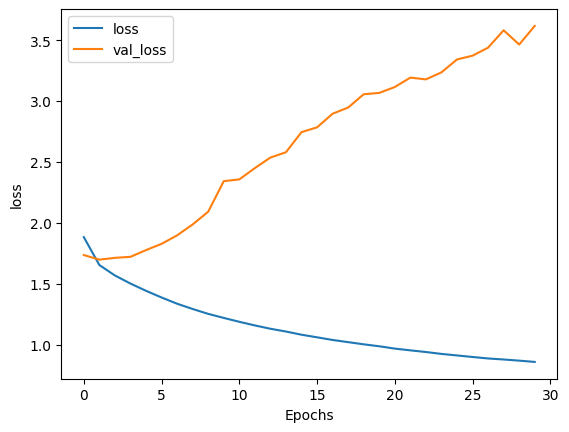

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


Using the above model for 30 Epochs, It is evident that the validation accuracy dropped while there was a gradual increase in training accuracy score. 
While the loss for the training declined but corresponding validation loss increased.

## test on unseen data.

In [ ]:
model_load = keras.models.load_model("/content/drive/MyDrive/NLP/models/exp1/exp1.h5")

In [ ]:
pred_exp1 = model_load.predict(test_padding)

1237/1237 [==============================] - 24s 15ms/step


In [ ]:
test_pred_exp1 = np.argmax(pred_exp1, axis=-1)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
confusionDisp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(test_labels, test_pred_exp1) )

In [ ]:
labels = ['admiration', 
       'anger',
       'curiosity',
        'disappointment'
       , 'disgust', 
        'embarrassment',
        'excitement',
        'fear',
       'gratitude', 
       'love',
        'nervousness',
        'pride',
       'sadness',
       'neutral'
]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'admiration'),
  Text(0, 1.5, 'anger'),
  Text(0, 2.5, 'curiosity'),
  Text(0, 3.5, 'disappointment'),
  Text(0, 4.5, 'disgust'),
  Text(0, 5.5, 'embarrassment'),
  Text(0, 6.5, 'excitement'),
  Text(0, 7.5, 'fear'),
  Text(0, 8.5, 'gratitude'),
  Text(0, 9.5, 'love'),
  Text(0, 10.5, 'nervousness'),
  Text(0, 11.5, 'pride'),
  Text(0, 12.5, 'sadness'),
  Text(0, 13.5, 'neutral')])

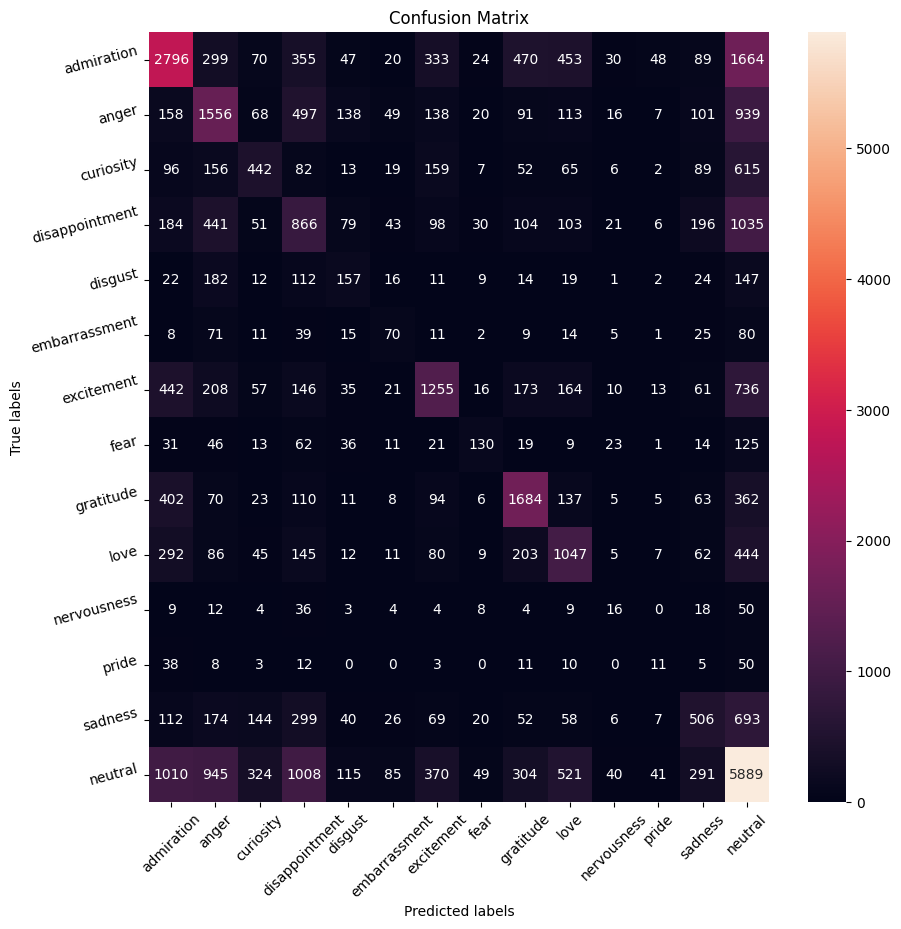

In [ ]:
plt.figure(figsize= (10,10))
ax= plt.subplot()
sns.heatmap(confusion_matrix(test_labels, test_pred_exp1)

, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 15)


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, test_pred_exp1)

In [ ]:
print(report)

              precision    recall  f1-score   support

           1       0.50      0.42      0.45      6698
           2       0.37      0.40      0.38      3891
           3       0.35      0.25      0.29      1803
           4       0.23      0.27      0.25      3257
           5       0.22      0.22      0.22       728
           6       0.18      0.19      0.19       361
           7       0.47      0.38      0.42      3337
           8       0.39      0.24      0.30       541
           9       0.53      0.57      0.55      2980
          10       0.38      0.43      0.41      2448
          11       0.09      0.09      0.09       177
          12       0.07      0.07      0.07       151
          13       0.33      0.23      0.27      2206
          14       0.46      0.54      0.49     10992

    accuracy                           0.42     39570
   macro avg       0.33      0.31      0.31     39570
weighted avg       0.42      0.42      0.41     39570



In [ ]:
# Evaluate the model
loss, acc = model_load.evaluate(test_padding, test_labels, verbose=2)
print(" Test: accuracy: {:5.2f}%".format(100 * acc))

1237/1237 - 20s - loss: 3.5881 - accuracy: 0.4151 - 20s/epoch - 16ms/step
 Test: accuracy: 41.51%


# Experiment 2

Experiment details
Again using Stemmed data.
1. Tokenization
2. Embedding using the vord2vec weigths.
3. Hyper-parameter tuning on bi-Directional LSTM 

## Tokenization and using Word2Vec (Google news-300)

In [ ]:
# Hyperparameters
vocab_size = 25000
embedding_dim = 64
max_length = 52
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
output_dim = 15
bi_directional_dim = 512

In [ ]:
from keras import preprocessing as kprocessing

In [ ]:
corpus = X_train
max_words = 20000
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', num_words=max_words, oov_token="<pad>", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus)
voc = tokenizer.word_index
reverse_voc = dict([(value, key) for (key, value) in voc.items()])

In [ ]:
from keras.utils import pad_sequences

In [ ]:
max_len = 20

sequences = tokenizer.texts_to_sequences(X_train)
corpus = pad_sequences(sequences, maxlen=max_len)

X_val_seq = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=max_len)

n=10 # You can adjust n
print('Shape: ',corpus.shape)
print(100*'-')
print('Example: ',corpus[n,:])

Shape:  (126621, 20)
----------------------------------------------------------------------------------------------------
Example:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10 400
   4 282]


In [ ]:
# This may take several minutes
w2v = api.load("word2vec-google-news-300")

[=================================================-] 99.6% 1655.4/1662.8MB downloaded


In [ ]:
w2v

In [ ]:
len(reverse_voc)

19838

In [ ]:
# Build weights of the embbeddings matrix using w2v
emb_matrix=np.zeros((max_words+1, 300))
for i in range(1,len( reverse_voc)):
    w = reverse_voc[i+1]
    if w in w2v:
        emb_matrix[i+1,:] = w2v[w]
emb_size = emb_matrix.shape[1]

In [ ]:
emb_matrix.shape

(20001, 300)

## Model definition

In [ ]:
exp2 = Sequential()
exp2.add(Embedding(max_words+1,emb_size,weights=[emb_matrix],trainable=False, name='embedding'))
exp2.add(Bidirectional(LSTM(bi_directional_dim, return_sequences=True)))
exp2.add(Dropout(0.2)) 
exp2.add(Bidirectional(LSTM(bi_directional_dim)))
exp2.add(Dropout(0.2))
exp2.add(Dense(bi_directional_dim, activation='relu'))
exp2.add(Dense(output_dim, activation='sigmoid'))
exp2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         6000300   
                                                                 
 bidirectional (Bidirectiona  (None, None, 1024)       3330048   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 1024)        0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1024)             6295552   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)              

In [ ]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9)

In [ ]:
exp2.compile(loss='sparse_categorical_crossentropy', optimizer= opt , metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/NLP/models/exp2/lr//model_{epoch:01d}.ckpt"

exp2_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                #  save_freq = 5 * 128
                                                 )

In [ ]:
num_epochs = 10
history_exp2 = exp2.fit(
    corpus,
    y_train, 
    epochs= num_epochs,
    validation_data=  (X_val_seq, y_val), 
    batch_size = 32,
    callbacks = [exp2_cp_callback]
    )

Epoch 1/10
3955/3957 [============================>.] - ETA: 0s - loss: 1.9748 - accuracy: 0.3674
Epoch 1: saving model to /content/drive/MyDrive/NLP/models/exp2/e/model_1.ckpt
3957/3957 [==============================] - 131s 32ms/step - loss: 1.9747 - accuracy: 0.3674 - val_loss: 1.9624 - val_accuracy: 0.3762
Epoch 2/10
3957/3957 [==============================] - ETA: 0s - loss: 1.9634 - accuracy: 0.3717
Epoch 2: saving model to /content/drive/MyDrive/NLP/models/exp2/e/model_2.ckpt
3957/3957 [==============================] - 130s 33ms/step - loss: 1.9634 - accuracy: 0.3717 - val_loss: 1.9590 - val_accuracy: 0.3739
Epoch 3/10
3956/3957 [============================>.] - ETA: 0s - loss: 1.9529 - accuracy: 0.3758
Epoch 3: saving model to /content/drive/MyDrive/NLP/models/exp2/e/model_3.ckpt
3957/3957 [==============================] - 130s 33ms/step - loss: 1.9529 - accuracy: 0.3758 - val_loss: 1.9464 - val_accuracy: 0.3820
Epoch 4/10
3957/3957 [==============================] - ETA: 

In [ ]:
num_epochs = 10
history_exp2 = exp2.fit(
    corpus,
    y_train, 
    epochs= num_epochs,
    validation_data=  (X_val_seq, y_val), 
    batch_size = 32,
    callbacks = [
        exp2_cp_callback,
        # trying multiple Learning rates each epoch.
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
    )

Epoch 1/10
3955/3957 [============================>.] - ETA: 0s - loss: 1.8157 - accuracy: 0.4207
Epoch 1: saving model to /content/drive/MyDrive/NLP/models/exp2/lr/model_1.ckpt
3957/3957 [==============================] - 95s 24ms/step - loss: 1.8157 - accuracy: 0.4207 - val_loss: 1.8944 - val_accuracy: 0.3965 - lr: 0.0010
Epoch 2/10
3957/3957 [==============================] - ETA: 0s - loss: 1.8042 - accuracy: 0.4243
Epoch 2: saving model to /content/drive/MyDrive/NLP/models/exp2/lr/model_2.ckpt
3957/3957 [==============================] - 95s 24ms/step - loss: 1.8042 - accuracy: 0.4243 - val_loss: 1.8844 - val_accuracy: 0.3977 - lr: 0.0011
Epoch 3/10
3955/3957 [============================>.] - ETA: 0s - loss: 1.7840 - accuracy: 0.4297
Epoch 3: saving model to /content/drive/MyDrive/NLP/models/exp2/lr/model_3.ckpt
3957/3957 [==============================] - 93s 23ms/step - loss: 1.7840 - accuracy: 0.4296 - val_loss: 1.8795 - val_accuracy: 0.3991 - lr: 0.0012
Epoch 4/10
3955/3957 [

In [ ]:
exp2.save('/content/drive/MyDrive/NLP/models/exp2/model/exp2.h5')

In [ ]:
exp2.save_weights(checkpoint_path.format(epoch=0))

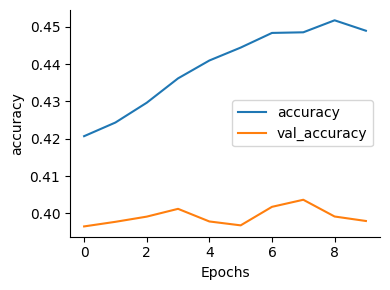

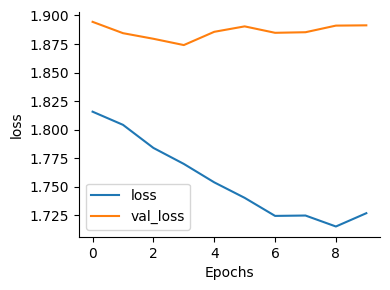

In [ ]:
def plot_graphs(history, string):
  plt.figure(figsize=(4,3))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.tight_layout()
  plt.show()

plot_graphs(history_exp2, "accuracy")
plot_graphs(history_exp2, "loss")

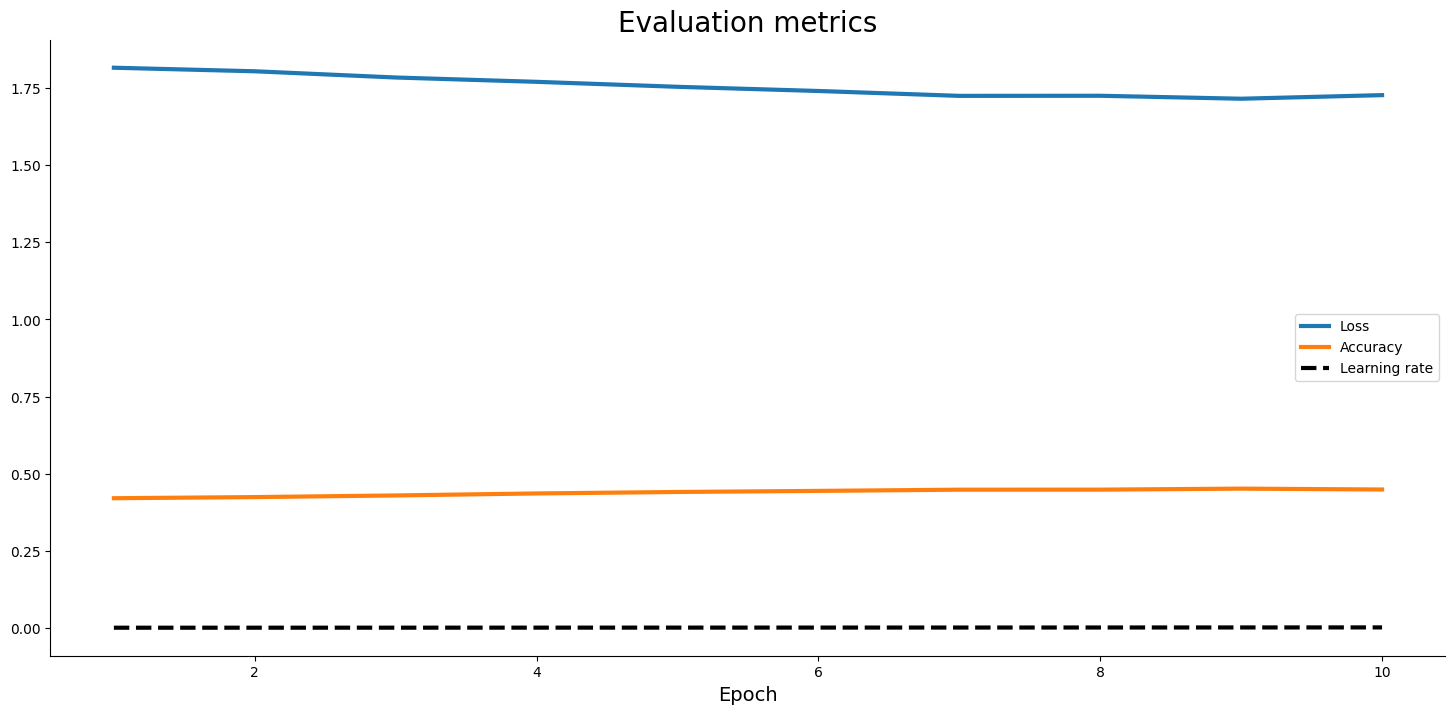

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 11), 
    history_exp2.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 11), 
    history_exp2.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 11), 
    history_exp2.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

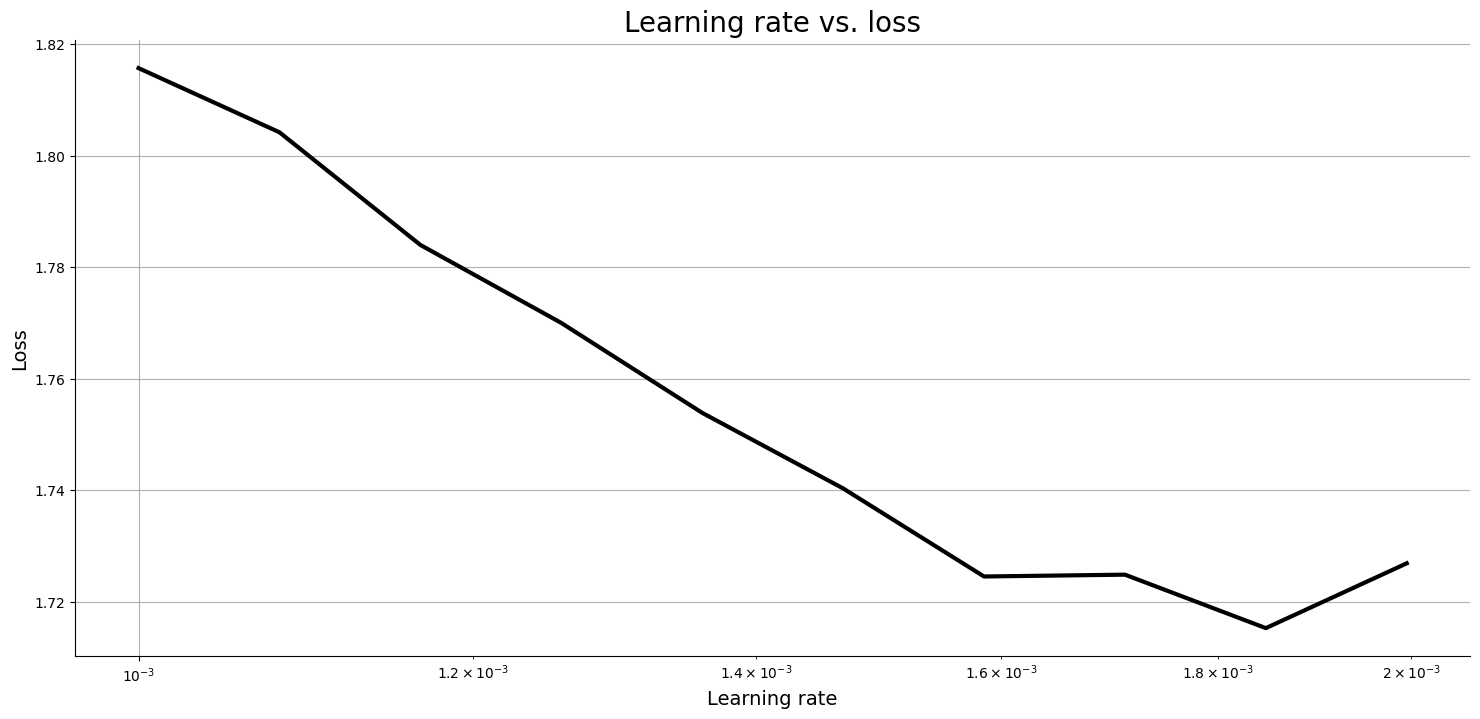

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(10) / 30))
plt.semilogx(
    learning_rates, 
    history_exp2.history['loss'], 
    lw=3, color='#000'
)

plt.grid()
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

lowest loss rate is 1.85 x 10^3. Which is going to be used in the experiment 3 along with some other modifications. 

## test on unseen data.

In [ ]:
pred_exp2 = exp2.predict(X_test_seq)

1237/1237 [==============================] - 12s 7ms/step


In [ ]:
loss, acc = exp2.evaluate(X_test_seq, y_test, verbose=2)

1237/1237 - 11s - loss: 1.8844 - accuracy: 0.3985 - 11s/epoch - 9ms/step


In [ ]:
test_pred_exp2 = np.argmax(pred_exp2, axis=-1)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
confusionDisp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, test_pred_exp2) )

In [ ]:
labels = ['admiration', 
       'anger',
       'curiosity',
        'disappointment'
       , 'disgust', 
        'embarrassment',
        'excitement',
        'fear',
       'gratitude', 
       'love',
        'nervousness',
        'pride',
       'sadness',
       'neutral'
]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'admiration'),
  Text(0, 1.5, 'anger'),
  Text(0, 2.5, 'curiosity'),
  Text(0, 3.5, 'disappointment'),
  Text(0, 4.5, 'disgust'),
  Text(0, 5.5, 'embarrassment'),
  Text(0, 6.5, 'excitement'),
  Text(0, 7.5, 'fear'),
  Text(0, 8.5, 'gratitude'),
  Text(0, 9.5, 'love'),
  Text(0, 10.5, 'nervousness'),
  Text(0, 11.5, 'pride'),
  Text(0, 12.5, 'sadness'),
  Text(0, 13.5, 'neutral')])

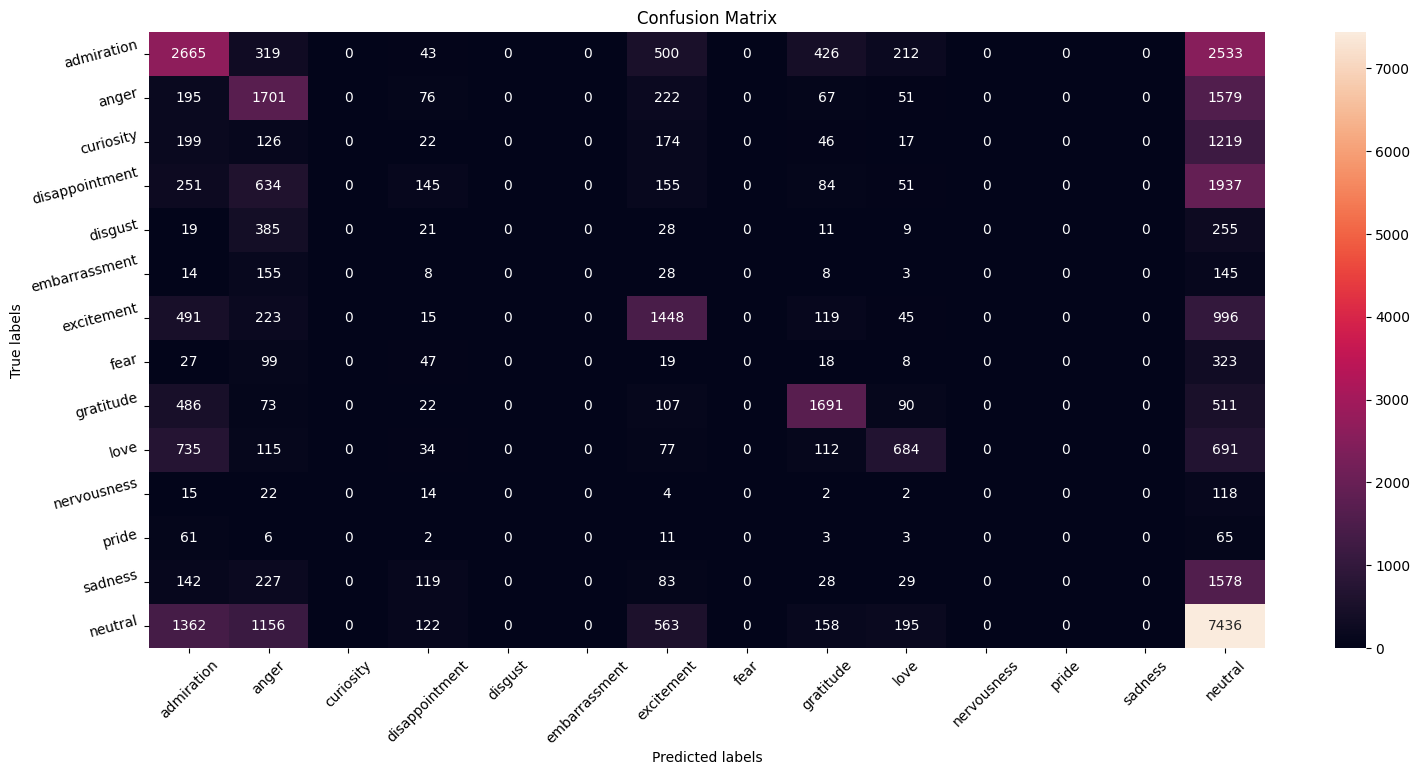

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, test_pred_exp2)
, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 15)

In [ ]:
print(classification_report(y_test, test_pred_exp2_mod))

              precision    recall  f1-score   support

           1       0.40      0.40      0.40      6698
           2       0.32      0.44      0.37      3891
           3       0.00      0.00      0.00      1803
           4       0.21      0.04      0.07      3257
           5       0.00      0.00      0.00       728
           6       0.00      0.00      0.00       361
           7       0.42      0.43      0.43      3337
           8       0.00      0.00      0.00       541
           9       0.61      0.57      0.59      2980
          10       0.49      0.28      0.36      2448
          11       0.00      0.00      0.00       177
          12       0.00      0.00      0.00       151
          13       0.00      0.00      0.00      2206
          14       0.38      0.68      0.49     10992

    accuracy                           0.40     39570
   macro avg       0.20      0.20      0.19     39570
weighted avg       0.34      0.40      0.35     39570



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Experiment 3

Experiment details 

Again using Stemmed data.

1. Tokenization and Vocabulary using the TF-IDF
2. padding 
3. Embedding using the vord2vec weigths.
4. Hyper-parameter tuning on bi-Directional LSTM 

using the same architecture as the experiment 2 but using the optimum learning rate. 

## Model Definition

In [ ]:
exp3 = Sequential()
exp3.add(Embedding(max_words+1,emb_size,weights=[emb_matrix],trainable=False, name='embedding'))
exp3.add(Bidirectional(LSTM(bi_directional_dim, return_sequences=True)))
exp3.add(Dropout(0.2)) 
exp3.add(Bidirectional(LSTM(bi_directional_dim)))
exp3.add(Dropout(0.2))
exp3.add(Dense(bi_directional_dim, activation='relu'))
exp3.add(Dense(output_dim, activation='sigmoid'))
exp3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         6000300   
                                                                 
 bidirectional (Bidirectiona  (None, None, 1024)       3330048   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 1024)        0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1024)             6295552   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               5

In [ ]:
opt = optimizers.Adam(learning_rate=0.00185, beta_1 = 0.9)

In [ ]:
exp3.compile(loss='sparse_categorical_crossentropy', optimizer= opt , metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/NLP/models/exp3/lr//model_{epoch:01d}.ckpt"

exp3_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                #  save_freq = 5 * 128
                                                 )

In [ ]:
num_epochs = 20
history_exp3 = exp3.fit(
    corpus,
    y_train, 
    epochs= num_epochs,
    validation_data=  (X_val_seq, y_val), 
    batch_size = 128,
    callbacks = [exp3_cp_callback]
    )

Epoch 1/20
989/990 [============================>.] - ETA: 0s - loss: 1.8809 - accuracy: 0.3949
Epoch 1: saving model to /content/drive/MyDrive/NLP/models/exp3/lr/model_1.ckpt
990/990 [==============================] - 67s 58ms/step - loss: 1.8809 - accuracy: 0.3948 - val_loss: 1.8221 - val_accuracy: 0.4119
Epoch 2/20
989/990 [============================>.] - ETA: 0s - loss: 1.7807 - accuracy: 0.4242
Epoch 2: saving model to /content/drive/MyDrive/NLP/models/exp3/lr/model_2.ckpt
990/990 [==============================] - 58s 58ms/step - loss: 1.7807 - accuracy: 0.4242 - val_loss: 1.7754 - val_accuracy: 0.4214
Epoch 3/20
989/990 [============================>.] - ETA: 0s - loss: 1.7328 - accuracy: 0.4343
Epoch 3: saving model to /content/drive/MyDrive/NLP/models/exp3/lr/model_3.ckpt
990/990 [==============================] - 59s 59ms/step - loss: 1.7328 - accuracy: 0.4343 - val_loss: 1.7610 - val_accuracy: 0.4268
Epoch 4/20
989/990 [============================>.] - ETA: 0s - loss: 1.6

In [ ]:
exp3.save('/content/drive/MyDrive/NLP/models/exp3/model/exp3.h5')

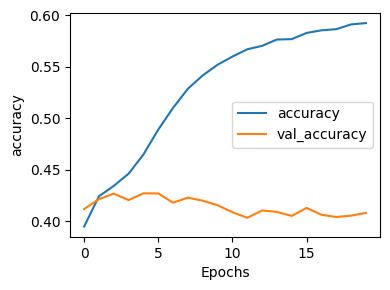

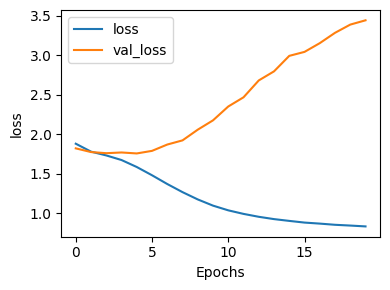

In [ ]:
def plot_graphs(history, string):
  plt.figure(figsize=(4,3))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.tight_layout()
  plt.show()
  
plot_graphs(history_exp3, "accuracy")
plot_graphs(history_exp3, "loss")

## test on unseen data.

In [ ]:
pred_exp3 = exp3.predict(X_test_seq)

1237/1237 [==============================] - 12s 8ms/step


In [ ]:
loss, acc = exp3.evaluate(X_test_seq, y_test, verbose=2)

1237/1237 - 11s - loss: 3.3994 - accuracy: 0.4088 - 11s/epoch - 9ms/step


In [ ]:
test_pred_exp3 = np.argmax(pred_exp3, axis=-1)

In [ ]:
confusionDisp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, test_pred_exp2) )

In [ ]:
labels = ['admiration', 
       'anger',
       'curiosity',
        'disappointment'
       , 'disgust', 
        'embarrassment',
        'excitement',
        'fear',
       'gratitude', 
       'love',
        'nervousness',
        'pride',
       'sadness',
       'neutral'
]

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'admiration'),
  Text(0, 1.5, 'anger'),
  Text(0, 2.5, 'curiosity'),
  Text(0, 3.5, 'disappointment'),
  Text(0, 4.5, 'disgust'),
  Text(0, 5.5, 'embarrassment'),
  Text(0, 6.5, 'excitement'),
  Text(0, 7.5, 'fear'),
  Text(0, 8.5, 'gratitude'),
  Text(0, 9.5, 'love'),
  Text(0, 10.5, 'nervousness'),
  Text(0, 11.5, 'pride'),
  Text(0, 12.5, 'sadness'),
  Text(0, 13.5, 'neutral')])

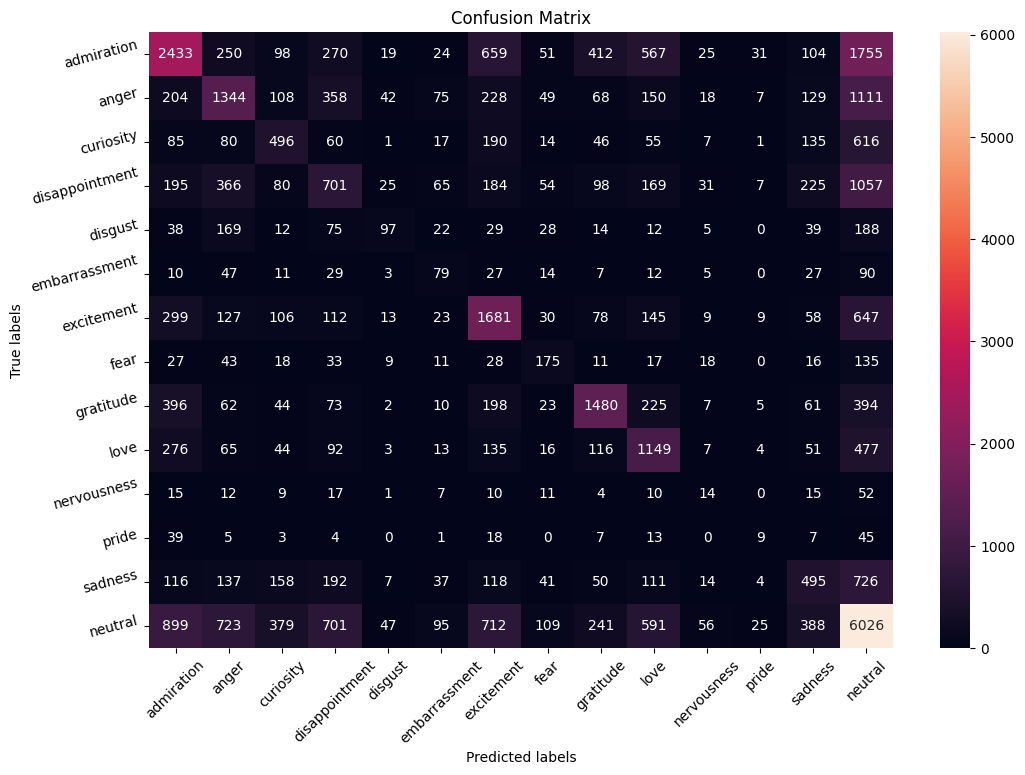

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, test_pred_exp3)
, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 15)

In [ ]:
print(classification_report(y_test, test_pred_exp3))

              precision    recall  f1-score   support

           1       0.48      0.36      0.41      6698
           2       0.39      0.35      0.37      3891
           3       0.32      0.28      0.29      1803
           4       0.26      0.22      0.23      3257
           5       0.36      0.13      0.19       728
           6       0.16      0.22      0.19       361
           7       0.40      0.50      0.45      3337
           8       0.28      0.32      0.30       541
           9       0.56      0.50      0.53      2980
          10       0.36      0.47      0.41      2448
          11       0.06      0.08      0.07       177
          12       0.09      0.06      0.07       151
          13       0.28      0.22      0.25      2206
          14       0.45      0.55      0.50     10992

    accuracy                           0.41     39570
   macro avg       0.32      0.30      0.30     39570
weighted avg       0.41      0.41      0.40     39570



# Experiment 4

Experiment details 

Again using Stemmed data.

1. Tokenization and Vocabulary using the TF-IDF
2. Padding + Embedding.
3. CNN + LSTM network

##  train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/text_pro.csv', ).reset_index(drop =True)

In [ ]:
df.head()

,Unnamed: 0,text,labels
0,0,game hurt,13
1,1,right care fuck em,14
2,2,man love reddit,10
3,3,nowher near falcon,14
4,4,right consid import document know damn thing b...,9


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace =True)

In [ ]:
df.head()

,text,labels
0,game hurt,13
1,right care fuck em,14
2,man love reddit,10
3,nowher near falcon,14
4,right consid import document know damn thing b...,9


In [ ]:
df[df['text'].isnull() == True]

,text,labels
83,NaN,14
339,NaN,4
539,NaN,14
1383,NaN,14
1904,NaN,14
...,...,...
196710,NaN,14
196803,NaN,13
197492,NaN,13
197689,NaN,14


In [ ]:
temp = df[df['text'].isnull() != True]

In [ ]:
temp[temp.text.isnull() == True]

,text,labels


In [ ]:
X = temp['text']
y = temp['labels']

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state = 42)

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 42)

## tokenization and Vocabulary

tokenizer will hash each word and provide the vocabulary based on the max length of words specified.

In [ ]:
# Hyperparameters
vocab_size = 25000
embedding_dim = 64
max_length = 50
trunc_type = 'pre'
padding_type = 'pre'
oov_tok = '<OOV>'
output_dim = 14
bi_directional_dim = 512

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
dict(list(word_index.items()) [0:10])

{'<OOV>': 1,
 'like': 2,
 'get': 3,
 'thank': 4,
 'love': 5,
 'one': 6,
 'would': 7,
 'peopl': 8,
 'think': 9,
 'good': 10}

In [ ]:
train_seq = tokenizer.texts_to_sequences(X_train)
val_seq = tokenizer.texts_to_sequences(x_val)
test_seq = tokenizer.texts_to_sequences(x_test)

## padding



In [ ]:
train_padding = pad_sequences(train_seq, max_length, padding = padding_type, truncating= trunc_type)

In [ ]:
# for test data
test_padding = pad_sequences(test_seq, max_length, padding = padding_type, truncating= trunc_type)

In [ ]:
val_padding = pad_sequences(val_seq, max_length,  padding = padding_type, truncating= trunc_type )

In [ ]:
train_labels = np.array(y_train)
train_labels.shape

(126117,)

In [ ]:
test_labels = np.array(y_test)
test_labels.shape

(39412,)

In [ ]:
val_labels = np.array(y_val)
val_labels.shape

(31530,)

In [ ]:
train_padding.shape

(126117, 50)

In [ ]:
test_padding.shape

(39412, 50)

In [ ]:
val_padding.shape

(31530, 50)

## model definition

In [ ]:

cnn_model = Sequential()
cnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
cnn_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(100))
cnn_model.add(Dense(units=15, activation='sigmoid'))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            1600000   
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 lstm_4 (LSTM)               (None, 100)               66000     
                                                                 
 dense_4 (Dense)             (None, 15)                1515      
                                                                 
Total params: 1,679,867
Trainable params: 1,679,867
Non-trainable params: 0
____________________________________________

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=opt, 
                  metrics=['accuracy'])

In [ ]:
filepath="/content/drive/MyDrive/NLP/models/exp3"
exp3_cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    verbose=1,
)

In [ ]:
history_exp4 = cnn_model.fit(
    train_padding,
    train_labels,
    epochs=20, 
    batch_size=128,
    verbose = 1,
    callbacks = exp3_cp_callback,
    validation_data=(val_padding,val_labels)
    )

Epoch 1/20
986/986 [==============================] - ETA: 0s - loss: 1.8592 - accuracy: 0.4051
Epoch 1: saving model to /content/drive/MyDrive/NLP/models/exp3
986/986 [==============================] - 128s 126ms/step - loss: 1.8592 - accuracy: 0.4051 - val_loss: 1.7129 - val_accuracy: 0.4480
Epoch 2/20
986/986 [==============================] - ETA: 0s - loss: 1.6153 - accuracy: 0.4708
Epoch 2: saving model to /content/drive/MyDrive/NLP/models/exp3
986/986 [==============================] - 121s 123ms/step - loss: 1.6153 - accuracy: 0.4708 - val_loss: 1.6844 - val_accuracy: 0.4466
Epoch 3/20
986/986 [==============================] - ETA: 0s - loss: 1.5057 - accuracy: 0.4968
Epoch 3: saving model to /content/drive/MyDrive/NLP/models/exp3
986/986 [==============================] - 123s 125ms/step - loss: 1.5057 - accuracy: 0.4968 - val_loss: 1.6940 - val_accuracy: 0.4479
Epoch 4/20
986/986 [==============================] - ETA: 0s - loss: 1.4139 - accuracy: 0.5164
Epoch 4: saving mod

In [ ]:
cnn_model.save('/content/drive/MyDrive/NLP/models/exp3/model/cnn_model.h5')

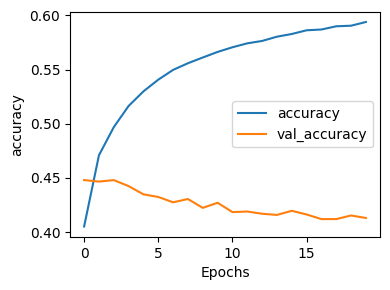

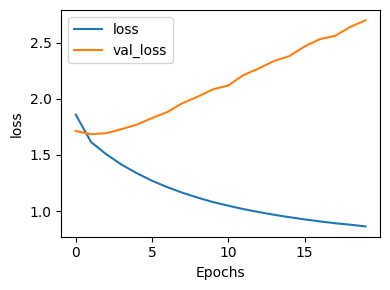

In [ ]:
def plot_graphs(history, string):
  plt.figure(figsize=(4,3))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.tight_layout()
  plt.show()
  
plot_graphs(history_exp4, "accuracy")
plot_graphs(history_exp4, "loss")

## test on unseen data.

In [ ]:
pred_exp4 = cnn_model.predict(test_padding)

1232/1232 [==============================] - 19s 15ms/step


In [ ]:
loss, acc = cnn_model.evaluate(test_padding, test_labels, verbose=2)

1232/1232 - 17s - loss: 2.7051 - accuracy: 0.4109 - 17s/epoch - 13ms/step


In [ ]:
test_pred_exp4 = np.argmax(pred_exp4, axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
labels = ['admiration', 
       'anger',
       'curiosity',
        'disappointment'
       , 'disgust', 
        'embarrassment',
        'excitement',
        'fear',
       'gratitude', 
       'love',
        'nervousness',
        'pride',
       'sadness',
       'neutral'
]

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'admiration'),
  Text(0, 1.5, 'anger'),
  Text(0, 2.5, 'curiosity'),
  Text(0, 3.5, 'disappointment'),
  Text(0, 4.5, 'disgust'),
  Text(0, 5.5, 'embarrassment'),
  Text(0, 6.5, 'excitement'),
  Text(0, 7.5, 'fear'),
  Text(0, 8.5, 'gratitude'),
  Text(0, 9.5, 'love'),
  Text(0, 10.5, 'nervousness'),
  Text(0, 11.5, 'pride'),
  Text(0, 12.5, 'sadness'),
  Text(0, 13.5, 'neutral')])

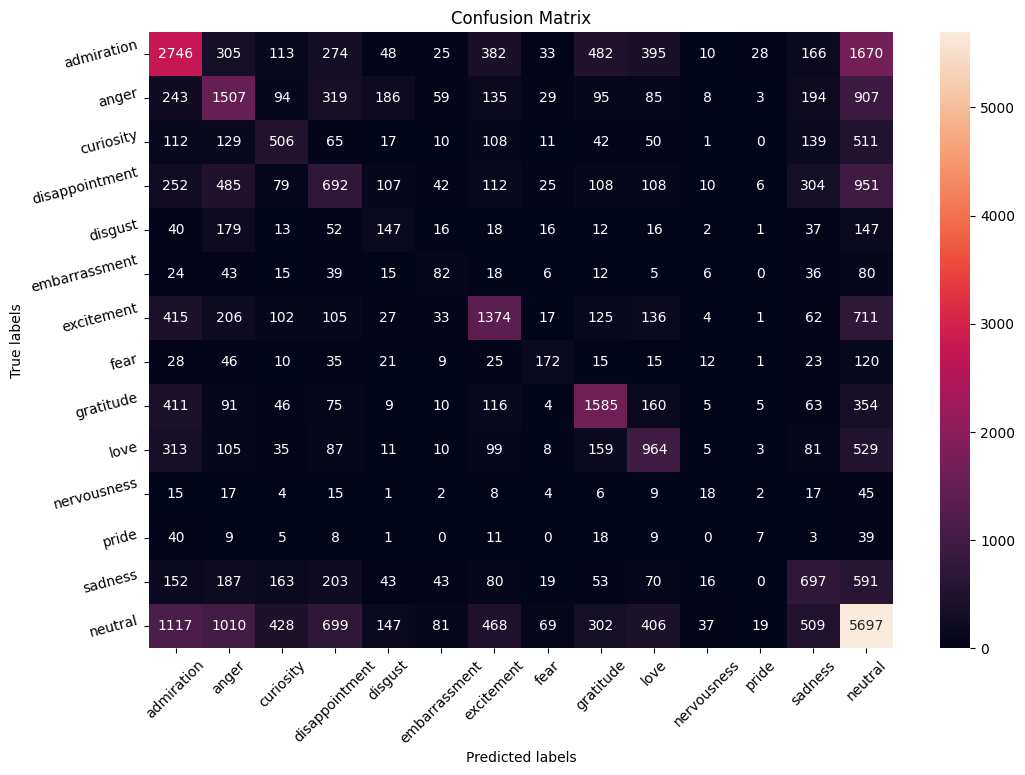

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(test_labels, test_pred_exp4)
, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels)
plt.xticks(rotation = 45)
plt.yticks(rotation = 15)

In [ ]:
print(classification_report(test_labels, test_pred_exp4))

              precision    recall  f1-score   support

           1       0.46      0.41      0.44      6677
           2       0.35      0.39      0.37      3864
           3       0.31      0.30      0.31      1701
           4       0.26      0.21      0.23      3281
           5       0.19      0.21      0.20       696
           6       0.19      0.22      0.20       381
           7       0.47      0.41      0.44      3318
           8       0.42      0.32      0.36       532
           9       0.53      0.54      0.53      2934
          10       0.40      0.40      0.40      2409
          11       0.13      0.11      0.12       163
          12       0.09      0.05      0.06       150
          13       0.30      0.30      0.30      2317
          14       0.46      0.52      0.49     10989

    accuracy                           0.41     39412
   macro avg       0.33      0.31      0.32     39412
weighted avg       0.41      0.41      0.41     39412

